
# Integrantes:
-Rodrigo Pino

-Cristobal Cortes

-Edgar Ramos

-Christian Garrido

# Acerca de la data

#### El conjunto de datos original consiste en imágenes de rayos X de radiografías de tórax recopiladas de pacientes pediátricos de uno a cinco años del Guangzhou Women and Children's Medical Center en Guangzhou. Inicialmente, el conjunto de datos se divide en dos conjuntos: entrenamiento (train) y prueba (test).

#### Sin embargo, como parte de este proyecto, se realizará una subdivisión adicional del conjunto de entrenamiento para crear un conjunto de validación. Algunos datos del conjunto de entrenamiento se seleccionarán aleatoriamente y se utilizarán como datos de validación para evaluar el rendimiento del modelo durante el entrenamiento.

#### En resumen, el conjunto de datos original comprende imágenes de rayos X de tórax de pacientes pediátricos, divididas en conjuntos de entrenamiento y prueba. Además, como parte del proceso de este proyecto, se creará un conjunto de validación mediante la selección aleatoria de datos del conjunto de entrenamiento.



# Reconocimientos

#### Data: https://data.mendeley.com/datasets/rscbjbr9sj/2

#### License: CC BY 4.0

#### Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5


# Importamos librerias

# Importamos la data

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.callbacks import TensorBoard

In [2]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='./chest_xray/train/',
    labels="inferred",
    label_mode="binary",
    class_names=['NORMAL', 'PNEUMONIA'],
    color_mode='rgb',
    image_size=(224, 224),
    shuffle=True,
    seed=10,
    validation_split=0.2,
    subset="training"
)

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='./chest_xray/train/',
    labels="inferred",
    label_mode="binary",
    class_names=['NORMAL', 'PNEUMONIA'],
    color_mode='rgb',
    image_size=(224, 224),
    shuffle=True,
    seed=10,
    validation_split=0.2,
    subset="validation"
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='./chest_xray/test/',
    labels="inferred",
    label_mode="binary",
    class_names=['NORMAL', 'PNEUMONIA'],
    color_mode='rgb',
    image_size=(224, 224),
    shuffle=True,
    seed=10
)



Found 5232 files belonging to 2 classes.
Using 4186 files for training.
Found 5232 files belonging to 2 classes.
Using 1046 files for validation.
Found 624 files belonging to 2 classes.


2023-06-02 16:33:29.469614: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-02 16:33:29.470185: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# Visualizamos la data

In [3]:
# Función para mostrar imágenes
def show_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(5):
            ax = plt.subplot(1, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            if (labels[i] == 0):
              plt.title("NORMAL")
            else:
              plt.title("PNEUMONIA")
            plt.axis("off")
    plt.show()

# Conjunto de entrenamiento

2023-06-02 16:33:35.352683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4186]
	 [[{{node Placeholder/_4}}]]
2023-06-02 16:33:35.352986: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4186]
	 [[{{node Placeholder/_4}}]]


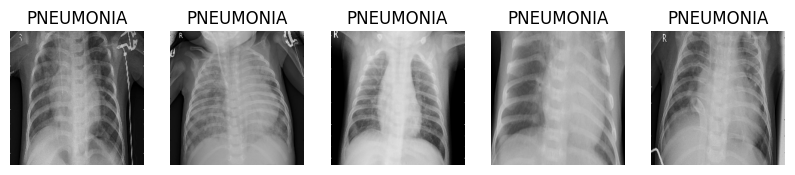

In [4]:
show_images(train_dataset)

# Conjunto de validacion

2023-06-02 16:13:54.635268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1046]
	 [[{{node Placeholder/_4}}]]
2023-06-02 16:13:54.635683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1046]
	 [[{{node Placeholder/_4}}]]


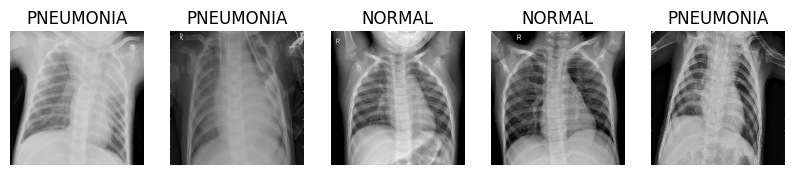

In [67]:
show_images(valid_dataset)

# Conjunto de pruebas

2023-06-02 16:13:59.277402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [624]
	 [[{{node Placeholder/_0}}]]
2023-06-02 16:13:59.277831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [624]
	 [[{{node Placeholder/_4}}]]


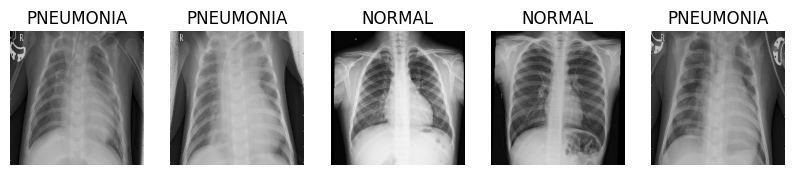

In [68]:
show_images(test_dataset)

# Analizamos los datos

In [5]:
# Contador de registros
normal_count_train = 0
pneumonia_count_train = 0

# Contar registros en el conjunto de entrenamiento
for _, labels in train_dataset:
    normal_count_train += sum(labels.numpy() == 0)
    pneumonia_count_train += sum(labels.numpy() == 1)

# Imprimir los resultados
print("Cantidad de registros en el conjunto de entrenamiento:")
print("Normal: {}".format(normal_count_train))
print("Pneumonía: {}".format(pneumonia_count_train))
print()

# Contador de registros
normal_count_valid = 0
pneumonia_count_valid = 0

# Contar registros en el conjunto de validación
for _, labels in valid_dataset:
    normal_count_valid += sum(labels.numpy() == 0)
    pneumonia_count_valid += sum(labels.numpy() == 1)

# Imprimir los resultados
print("Cantidad de registros en el conjunto de validación:")
print("Normal: {}".format(normal_count_valid))
print("Pneumonía: {}".format(pneumonia_count_valid))
print()

# Contador de registros
normal_count_test = 0
pneumonia_count_test = 0

# Contar registros en el conjunto de prueba
for _, labels in test_dataset:
    normal_count_test += sum(labels.numpy() == 0)
    pneumonia_count_test += sum(labels.numpy() == 1)

# Imprimir los resultados
print("Cantidad de registros en el conjunto de prueba:")
print("Normal: {}".format(normal_count_test))
print("Pneumonía: {}".format(pneumonia_count_test))

2023-06-02 16:33:38.821811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4186]
	 [[{{node Placeholder/_4}}]]
2023-06-02 16:33:38.822495: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4186]
	 [[{{node Placeholder/_4}}]]


Cantidad de registros en el conjunto de entrenamiento:
Normal: [1090]
Pneumonía: [3096]



2023-06-02 16:33:44.608622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1046]
	 [[{{node Placeholder/_4}}]]
2023-06-02 16:33:44.608905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1046]
	 [[{{node Placeholder/_0}}]]


Cantidad de registros en el conjunto de validación:
Normal: [259]
Pneumonía: [787]



2023-06-02 16:33:46.117223: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [624]
	 [[{{node Placeholder/_0}}]]
2023-06-02 16:33:46.117461: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [624]
	 [[{{node Placeholder/_4}}]]


Cantidad de registros en el conjunto de prueba:
Normal: [234]
Pneumonía: [390]


### Este análisis muestra la distribución de las etiquetas de clase en cada conjunto de datos. En el conjunto de entrenamiento, hay 1341 imágenes etiquetadas como "Normal" y 3875 imágenes etiquetadas como "Pneumonia". En el conjunto de validación y prueba, las cantidades son mucho menores, con 8 imágenes de cada clase en el conjunto de validación y 234 imágenes "Normales" y 390 imágenes "Pneumonia" en el conjunto de prueba.


 # ________________________________________________________________________________________________________________________________________

# Transfer learning

# VGG16

In [ ]:
# Cargar el modelo preentrenado EfficientNetB0 sin incluir la capa densa superior
base_model = VGG16(weights='imagenet', 
                            include_top=False, 
                            input_shape=(224, 224, 3))

### No se modificaran los pesos y bias del modelo base, por lo que se debera congelar los parametros entrenables

In [54]:
base_model.trainable = False

### Construimos el modelo agregando capas adicionales para la clasificacion binaria

In [17]:
# Construir el modelo final
modelo1 = tf.keras.Sequential()

# Normalización de las imágenes
modelo1.add(BatchNormalization(input_shape=(224, 224, 3)))

# Agregar el modelo base sin incluir la capa densa superior
modelo1.add(base_model)

# Capa de agrupamiento global
modelo1.add(GlobalAveragePooling2D())

# Capa densa con 256 neuronas y función de activación ReLU
modelo1.add(Dense(256, activation='relu'))

# Capa de salida con 1 unidad y función de activación sigmoide
modelo1.add(Dense(1, activation='sigmoid'))

### Compilamos

In [19]:
modelo1.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy", tf.keras.metrics.Recall()])

### Establecer directorio para guardar registros

In [20]:
tb = TensorBoard(log_dir="./logs/VGG16_freezed")

### Entrenamos el modelo

In [ ]:
modelo1.fit(train_dataset, validation_data=valid_dataset, epochs=10, callbacks=[tb])

### Guardamos el modelo

In [ ]:
modelo1.save("./trained_models/VGG16_freezed")

# Resnet50

In [56]:
# Cargar el modelo preentrenado EfficientNetB0 sin incluir la capa densa superior
base_model_2 = ResNet50(weights='imagenet', 
                            include_top=False, 
                            input_shape=(224, 224, 3))

### No se modificaran los pesos y bias del modelo base, por lo que se debera congelar los parametros entrenables

In [57]:
base_model_2.trainable = False

### Construimos el modelo agregando capas adicionales para la clasificacion binaria

In [ ]:
# Construir el modelo final
modelo2 = tf.keras.Sequential()

# Normalización de las imágenes
modelo2.add(BatchNormalization(input_shape=(224, 224, 3)))

# Agregar el modelo base sin incluir la capa densa superior
modelo2.add(base_model_2)

# Capa de agrupamiento global
modelo2.add(GlobalAveragePooling2D())

# Capa densa con 256 neuronas y función de activación ReLU
modelo2.add(Dense(256, activation='relu'))

# Capa de salida con 1 unidad y función de activación sigmoide
modelo2.add(Dense(1, activation='sigmoid'))

### Compilamos

In [ ]:
modelo2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy", tf.keras.metrics.Recall()])

### Establecer directorio para guardar registros

In [ ]:
tb = TensorBoard(log_dir="./logs/Resnet50_freezed")

### Entrenamos el moelo

In [ ]:
modelo2.fit(train_dataset, validation_data=valid_dataset, epochs=10, callbacks=[tb])

# Guardamos el modelo

In [ ]:
modelo2.save("./trained_models/Resnet50_freezed")